In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [7]:
data=pd.read_csv(r"C:\Users\minak\Desktop\AIML\Practice exercises\Diabetes.csv")

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
X=data.drop("Outcome",axis=1)
y=data["Outcome"]

In [10]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
X_scaled= scale.fit_transform(X)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.2,stratify=y,random_state=7)

In [12]:
train_score=[]
test_score=[]
k_vals=[]
for k in range(1,21):
    k_vals.append(k)
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    tr_score=knn.score(X_train,y_train)
    train_score.append(tr_score)
    
    tst_score=knn.score(X_test,y_test)
    test_score.append(tst_score)
    
    
    
    
    

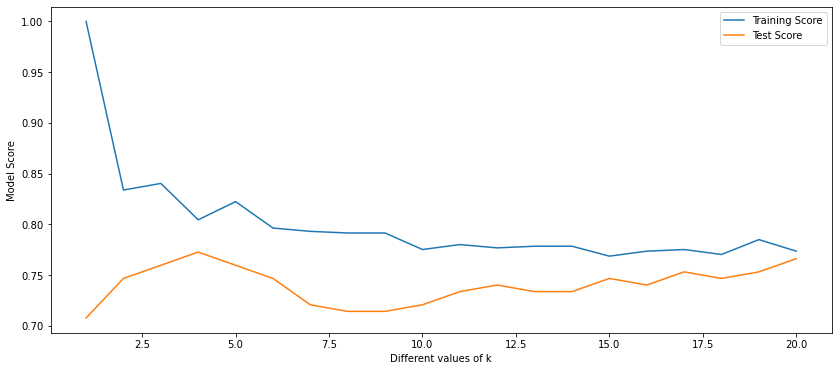

In [15]:
# lets plott the above data
plt.figure(figsize=(14,6))

plt.xlabel("Different values of k")
plt.ylabel("Model Score")
sns.lineplot(x=k_vals,y=train_score,label="Training Score")
sns.lineplot(x=k_vals,y=test_score,label="Test Score")

We can make the following conclusions from the above plot:

    For low values of k, the training score is high, while the testing score is low
    As the value of k increases, the testing score starts to increase and the training score starts to decrease.
    However, at some value of k, both the training score and the testing score are close to each other.

This is where Bias and Variance come into the picture.

## What is Bias?

In the simplest terms, Bias is the difference between the Predicted Value and the Expected Value. To explain further, the model makes certain assumptions when it trains on the data provided. When it is introduced to the testing/validation data, these assumptions may not always be correct.

In our model, if we use a large number of nearest neighbors, the model can totally decide that some parameters are not important at all.  For example, it can just consider that the Glusoce level and the Blood Pressure decide if the patient has diabetes. This model would make very strong assumptions about the other parameters not affecting the outcome. You can also think of it as a model predicting a simple relationship when the datapoints clearly indicate a more complex relationship:

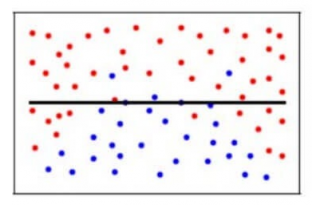



The Above picture indicates that the model has assumed very simple relationship among feature while learning from data.
when the model makes the generalizations i.e. when there is a high bias error, it results in a very simplistic model that does not consider the variations very well. Since it does not learn the training data very well, it is called  UNDERFITING.




## What is a Variance?

Contrary to bias, the Variance is when the model takes into account the fluctuations in the data i.e. the noise as well. So, what happens when our model has a high variance?

The model will still consider the variance as something to learn from. That is, the model learns too much from the training data, so much so, that when confronted with new (testing) data, it is unable to predict accurately based on it.

Since in the case of high variance, the model learns too much from the training data, it is called overfitting.

In the context of our data, if we use very few nearest neighbors, it is like saying that if the number of pregnancies is more than 3, the glucose level is more than 78, Diastolic BP is less than 98, Skin thickness is less than 23 mm and so on for every feature….. decide that the patient has diabetes. All the other patients who don’t meet the above criteria are not diabetic. While this may be true for one particular patient in the training set, what if these parameters are the outliers or were even recorded incorrectly? Clearly, such a model could prove to be very costly!

Additionally, this model would have a high variance error because the predictions of the patient being diabetic or not vary greatly with the kind of training data we are providing it. So even changing the Glucose Level to 75 would result in the model predicting that the patient does not have diabetes.


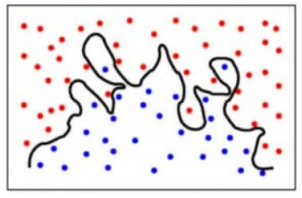

To summarise,

    A model with a high bias error underfits data and makes very simplistic assumptions on it
    A model with a high variance error overfits the data and learns too much from it
    A good model is where both Bias and Variance errors are balanced

 


## Bias-Variance Tradeoff

How do we relate the above concepts to our Knn model from earlier? Let’s find out!

In our model, say, for, k = 1, the point closest to the datapoint in question will be considered. Here, the prediction might be accurate for that particular data point so the bias error will be less.

However, the variance error will be high since only the one nearest point is considered and this doesn’t take into account the other possible points. What scenario do you think this corresponds to? Yes, you are thinking right, this means that our model is overfitting.

On the other hand, for higher values of k, many more points closer to the datapoint in question will be considered. This would result in higher bias error  and underfitting since many points closer to the datapoint are considered and thus it can’t learn the specifics from the training set. However, we can account for a lower variance error for the testing set which has unknown values.

To achieve a balance between the Bias error and the Variance error, we need a value of k such that the model neither learns from the noise (overfit on data) nor makes sweeping assumptions on the data(underfit on data). To keep it simpler, a balanced model would look like this:


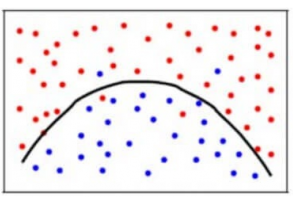



Though some points are classified incorrectly, the model generally fits most of the datapoints accurately. The balance between the Bias error and the Variance error is the Bias-Variance Tradeoff.

In terms of model complexity, we can use the following diagram to decide on the optimal complexity of our model.


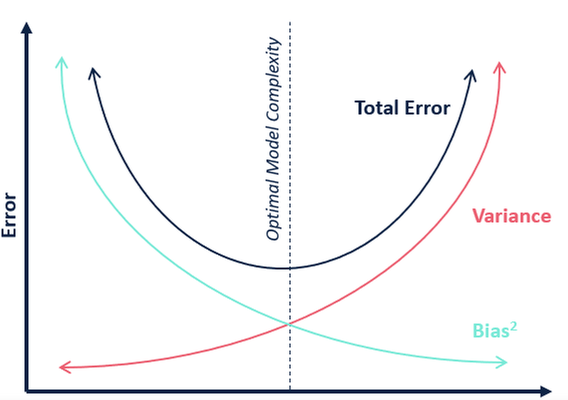

So, what do you think is the optimum value for k?

From the above explanation, we can conclude that the k for which

    the testing score is the highest, and
    both the test score and the training score are close to each other

is the optimal value of k. So, even though we are compromising on a lower training score, we still get a high score for our testing data which is more crucial – the test data is after all unknown data.



 

Let us make a table for different values of k to further prove this:
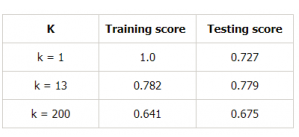

Thus K=13 is the optimum value of K

## Author : Purva Huilgol, August 11, 2020(Analytics vidhya)
